# Experimentación proyecto Machine Learning

## Análisis Exploratorio

<h3> 1. Extraer data </h3>

In [1]:
# Extraer data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv

--2022-06-27 17:01:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2163456 (2.1M) [application/x-httpd-php]
Saving to: ‘in-vehicle-coupon-recommendation.csv’

in-vehicle-coupon-r 100%[===================>]   2.06M  5.65MB/s    in 0.4s    

2022-06-27 17:01:37 (5.65 MB/s) - ‘in-vehicle-coupon-recommendation.csv’ saved [2163456/2163456]



In [ ]:
# Cargar la data
import pandas as pd
data = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
data.shape

(12684, 26)

### 2. Exploratory Data Analysis

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# Valores nulos por variables
na = data.isna().sum()/len(data)
na[na>0].sort_values(ascending = False)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
dtype: float64

In [ ]:
# Descartamos car
data = data.drop('car', axis = 1)
data.shape

(12684, 25)

In [ ]:
# Cantidad de valores por variable.
data.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [ ]:
# Descartamos toCoupon_GEQ5min
data = data.drop('toCoupon_GEQ5min', axis = 1)
data.shape

(12684, 24)

In [ ]:
# tipo de variables
# Aunque a excepción de temperature que es discreta, todas las demás son cualitativas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

#### Descripción de las variables.
- `destination` = Lugar de destino
- `passanger` = Pasajeros con quien va acompañado
- `weather` = Condición climática al conducir
- `temperature` = Temperatura al momento de conducir
- `time` = Hora en la que se le ofrece el cpón al conductor
- `coupon` = Tipo de cupón a canjear
- `expiration` = Caducidad del cupón en 1 día o 2 horas
- `gender` = Género (Masculino o Femenino)
- `age` = Edad
- `maritalStatus` = Estado Civil
- `has_children` = Tiene hijos
- `education` = Grado de Educación
- `occupation` = Ocupación u oficio
- `income` = Renta Anual
- `Bar` = ¿Cuántas veces va a un bar al mes?
- `CoffeeHouse` = ¿Cuántas veces va a una cafetería al mes?
- `CarryAway` = ¿Cuántas veces ordena comida para llevar al mes?
- `RestaurantLessThan20` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio de 20 dólares por persona al mes? 
- `Restaurant20To50` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio entre 20 y 50 dólares por persona al mes?
- `toCoupon_GEQ15min` = ¿Tarda más de 15 minutos en llegar al restaurante/bar para canjear el cupón?
- `toCoupon_GEQ25min` = ¿Tarda más de 25 minutos en llegar al restaurante/bar para canjear el cupón?
- `direction_same` = ¿El restaurante/bar está en la misma dirección que su destino actual?
- `direction_opp` = ¿El restaurante/bar está en diferente dirección a su destino actual? 
- `Y` = Acepta el cupón.

#### 2.1. Descriptivos univariados.

In [ ]:
# Descriptivos univariados.
# Variables cualitativas.
for col in data.columns:
    print('-'*33)
    print(col)
    print('-'*33)

    #if col not in ['temperature','time', 'age', 'income']:
    print(data[col].value_counts().sort_values(ascending = False), '\n')
    #else:
     # print(data[col].value_counts().sort_index(), '\n')

---------------------------------
destination
---------------------------------
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64 

---------------------------------
passanger
---------------------------------
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64 

---------------------------------
weather
---------------------------------
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64 

---------------------------------
temperature
---------------------------------
80    6528
55    3840
30    2316
Name: temperature, dtype: int64 

---------------------------------
time
---------------------------------
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64 

---------------------------------
coupon
---------------------------------
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar 

In [ ]:
# Descriptivos univariados.
# Variables cualitativas.
for col in data.columns:
    print('-'*33)
    print(col)
    print('-'*33)
    print(data[col].value_counts().sort_values(ascending = False)/len(data)*100, '\n')


---------------------------------
destination
---------------------------------
No Urgent Place    49.534847
Home               25.520341
Work               24.944812
Name: destination, dtype: float64 

---------------------------------
passanger
---------------------------------
Alone        57.592242
Friend(s)    26.001261
Partner       8.475244
Kid(s)        7.931252
Name: passanger, dtype: float64 

---------------------------------
weather
---------------------------------
Sunny    79.383475
Snowy    11.076947
Rainy     9.539577
Name: weather, dtype: float64 

---------------------------------
temperature
---------------------------------
80    51.466414
55    30.274361
30    18.259224
Name: temperature, dtype: float64 

---------------------------------
time
---------------------------------
6PM     25.465153
7AM     24.944812
10AM    17.935982
2PM     15.838852
10PM    15.815200
Name: time, dtype: float64 

---------------------------------
coupon
-------------------------------

--------------------------------------------------
destination
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



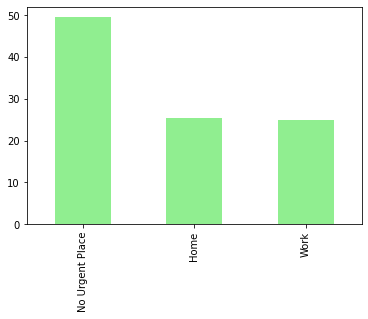

--------------------------------------------------
passanger
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



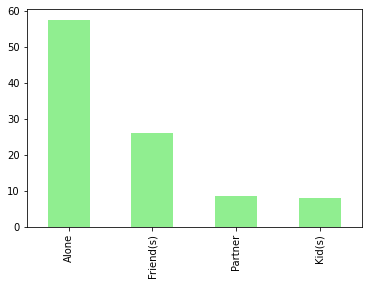

--------------------------------------------------
weather
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



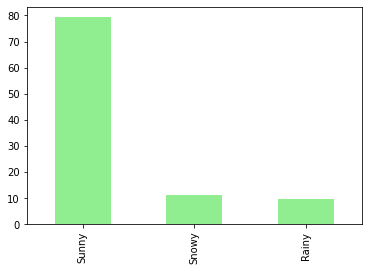

--------------------------------------------------
temperature
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



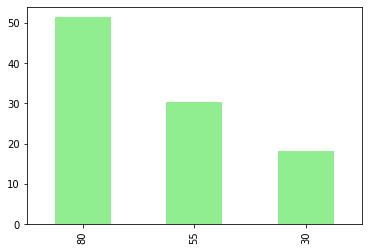

--------------------------------------------------
time
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



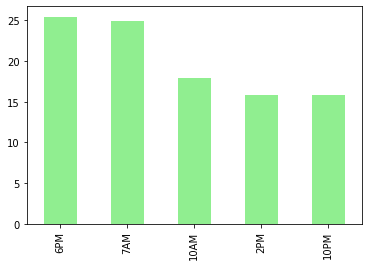

--------------------------------------------------
coupon
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



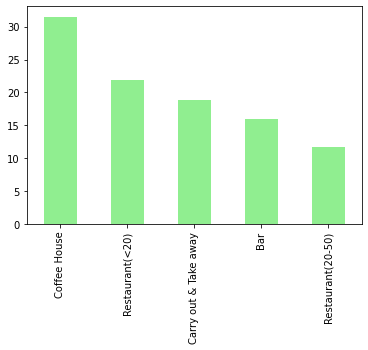

--------------------------------------------------
expiration
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



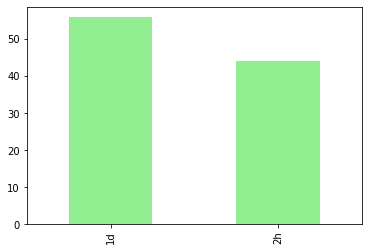

--------------------------------------------------
gender
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



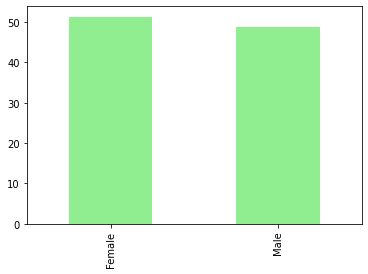

--------------------------------------------------
age
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



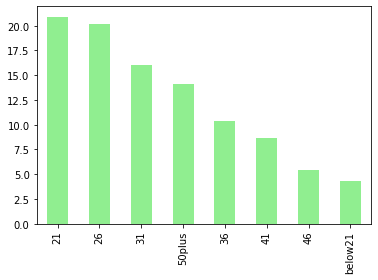

--------------------------------------------------
maritalStatus
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



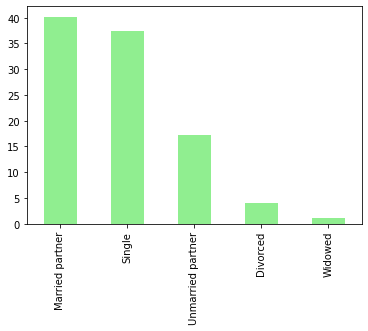

--------------------------------------------------
has_children
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



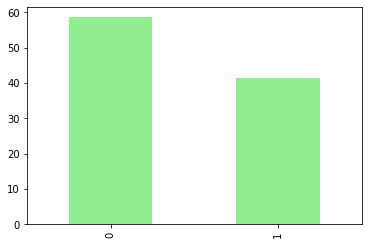

--------------------------------------------------
education
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



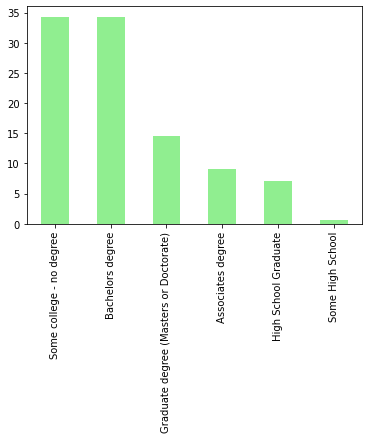

--------------------------------------------------
occupation
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



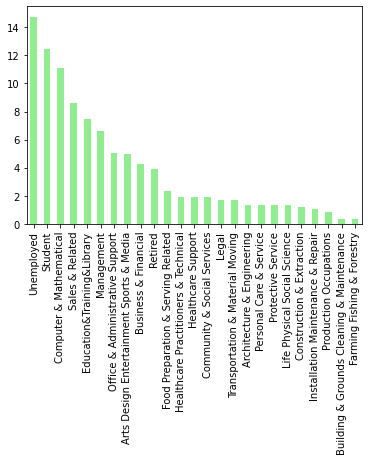

--------------------------------------------------
income
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



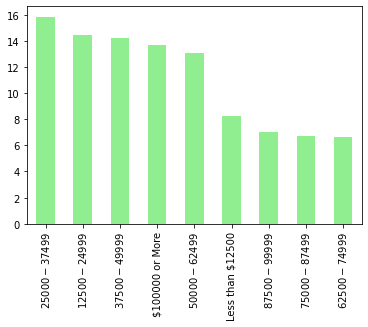

--------------------------------------------------
Bar
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



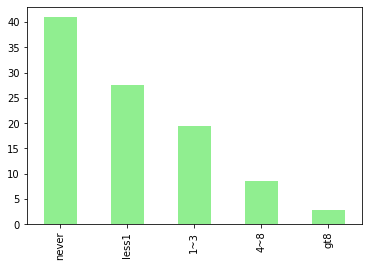

--------------------------------------------------
CoffeeHouse
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



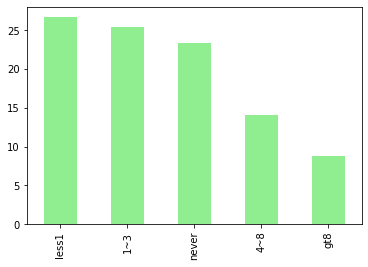

--------------------------------------------------
CarryAway
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



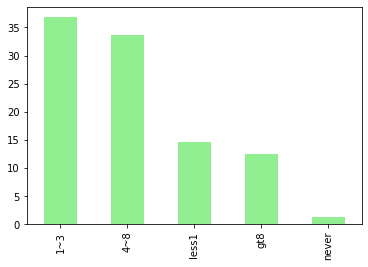

--------------------------------------------------
RestaurantLessThan20
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



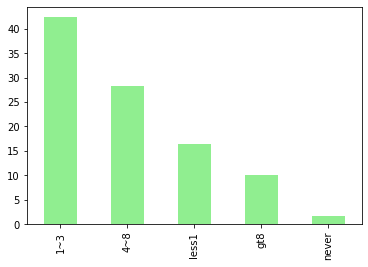

--------------------------------------------------
Restaurant20To50
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



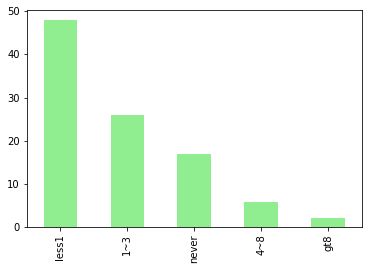

--------------------------------------------------
toCoupon_GEQ15min
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



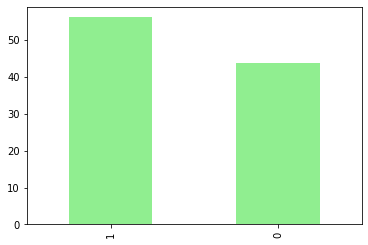

--------------------------------------------------
toCoupon_GEQ25min
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



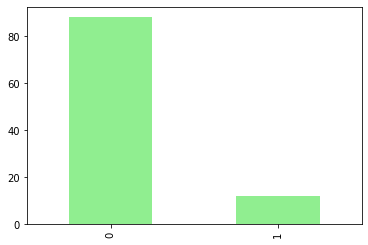

--------------------------------------------------
direction_same
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



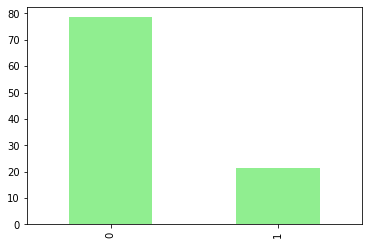

--------------------------------------------------
direction_opp
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



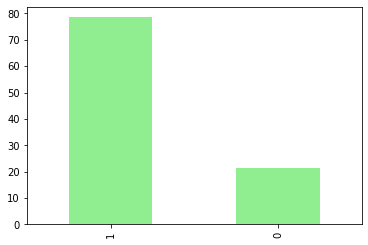

--------------------------------------------------
Y
--------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755) 



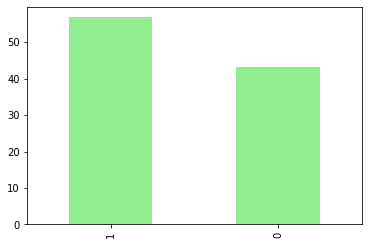

In [ ]:
# Descriptivos univariados.
# Variables cualitativas.
import matplotlib.pyplot as plt
for col in data.columns:
  #if data[col].dtype == 'object':
  print('-'*50)
  print(col)
  print('-'*50)
  print((data[col].value_counts().sort_values(ascending = False)/len(data)*100).plot(kind='bar', color = 'lightgreen'), '\n');
  plt.show()

- La variable car tiene aproximadamente el 99% de data faltante, por lo que se descarta del análisis.
- La variable `toCoupon_GEQ5min`  es descartada también, porque todos sus valores son 1.
-A excepción de `temperature`, el resto de características son cualitativas, sólo que algunas ya están codificadas.


#### 2.2. Análisis Bivariado.

In [ ]:
for col in data.columns:
  if col != 'Y':
    print('-'*42)
    print(col)
    print('-'*42)
    print(pd.crosstab(index = data[col],
              columns = data['Y'],
              values = data['Y'],
                aggfunc = 'count',
                #normalize = 'index',
                margins = True), '\n')

------------------------------------------
destination
------------------------------------------
Y                   0     1    All
destination                       
Home             1598  1639   3237
No Urgent Place  2301  3982   6283
Work             1575  1589   3164
All              5474  7210  12684 

------------------------------------------
passanger
------------------------------------------
Y             0     1    All
passanger                   
Alone      3464  3841   7305
Friend(s)  1077  2221   3298
Kid(s)      498   508   1006
Partner     435   640   1075
All        5474  7210  12684 

------------------------------------------
weather
------------------------------------------
Y           0     1    All
weather                   
Rainy     650   560   1210
Snowy     744   661   1405
Sunny    4080  5989  10069
All      5474  7210  12684 

------------------------------------------
temperature
------------------------------------------
Y               0     1    All
te

In [ ]:
for col in data.columns:
  if col != 'Y':
    print('-'*42)
    print(col)
    print('-'*42)
    print(pd.crosstab(index = data[col],
              columns = data['Y'],
              values = data['Y'],
                aggfunc = 'count',
                normalize = 'index'), '\n')

------------------------------------------
destination
------------------------------------------
Y                       0         1
destination                        
Home             0.493667  0.506333
No Urgent Place  0.366226  0.633774
Work             0.497788  0.502212 

------------------------------------------
passanger
------------------------------------------
Y                 0         1
passanger                    
Alone      0.474196  0.525804
Friend(s)  0.326562  0.673438
Kid(s)     0.495030  0.504970
Partner    0.404651  0.595349 

------------------------------------------
weather
------------------------------------------
Y               0         1
weather                    
Rainy    0.537190  0.462810
Snowy    0.529537  0.470463
Sunny    0.405204  0.594796 

------------------------------------------
temperature
------------------------------------------
Y                   0         1
temperature                    
30           0.468912  0.531088
55          

------------------------------------------
destination
------------------------------------------


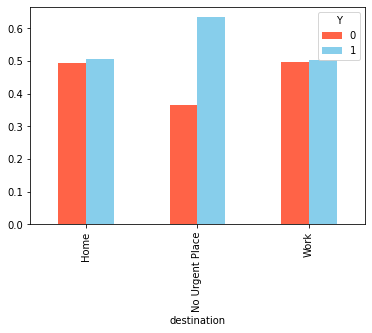

------------------------------------------
passanger
------------------------------------------


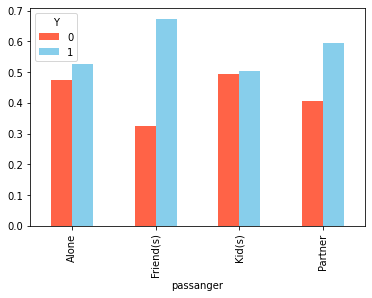

------------------------------------------
weather
------------------------------------------


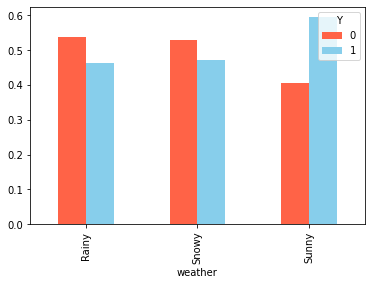

------------------------------------------
temperature
------------------------------------------


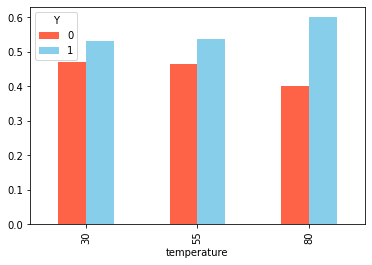

------------------------------------------
time
------------------------------------------


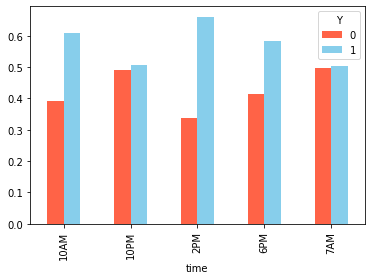

------------------------------------------
coupon
------------------------------------------


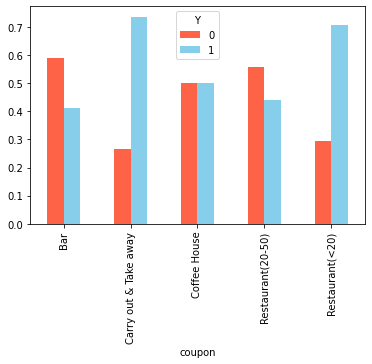

------------------------------------------
expiration
------------------------------------------


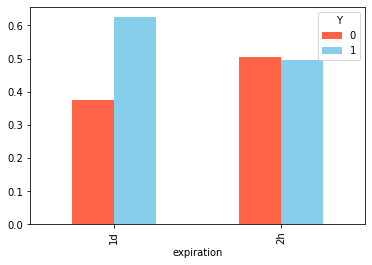

------------------------------------------
gender
------------------------------------------


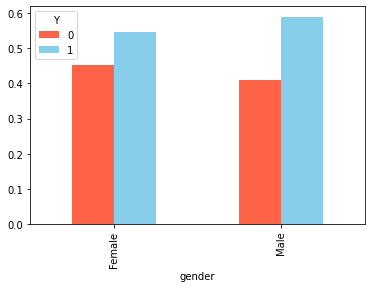

------------------------------------------
age
------------------------------------------


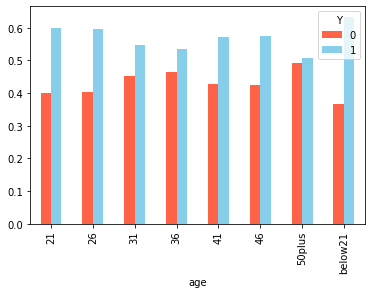

------------------------------------------
maritalStatus
------------------------------------------


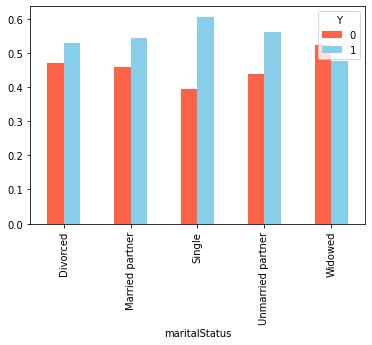

------------------------------------------
has_children
------------------------------------------


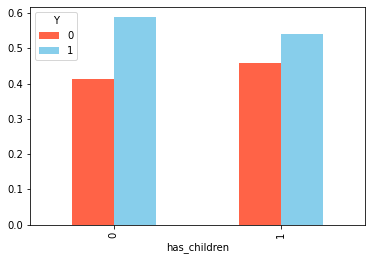

------------------------------------------
education
------------------------------------------


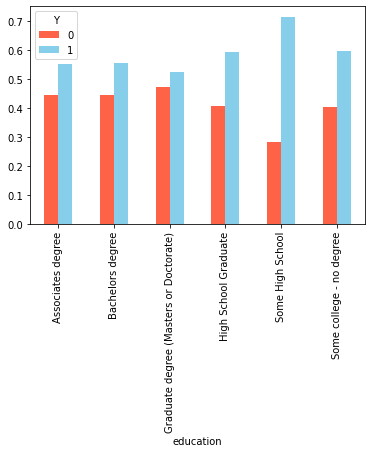

------------------------------------------
occupation
------------------------------------------


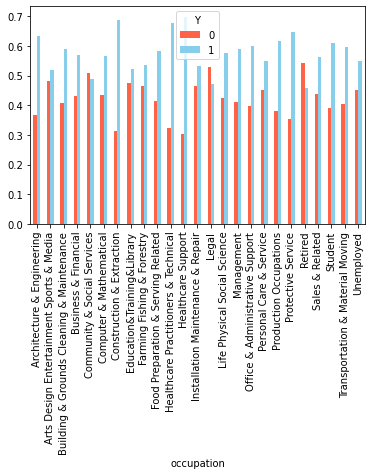

------------------------------------------
income
------------------------------------------


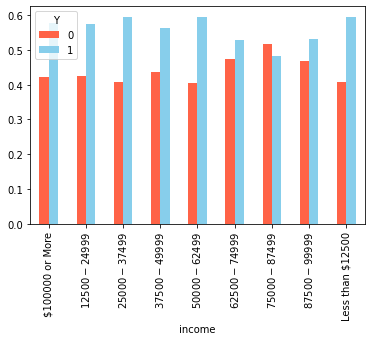

------------------------------------------
Bar
------------------------------------------


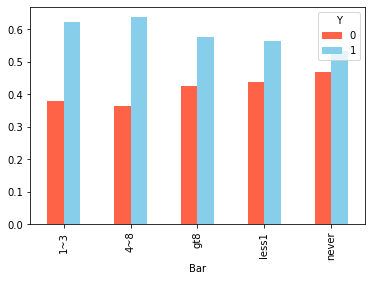

------------------------------------------
CoffeeHouse
------------------------------------------


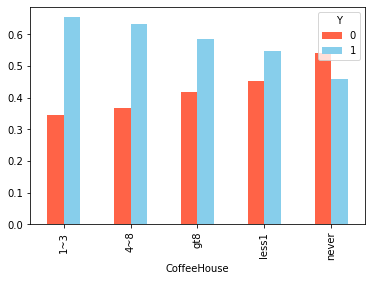

------------------------------------------
CarryAway
------------------------------------------


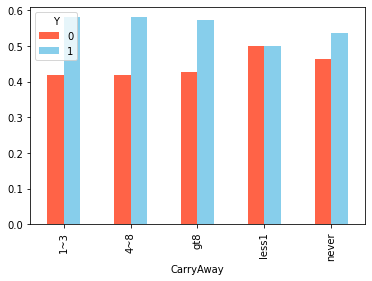

------------------------------------------
RestaurantLessThan20
------------------------------------------


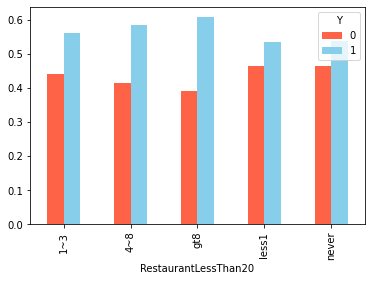

------------------------------------------
Restaurant20To50
------------------------------------------


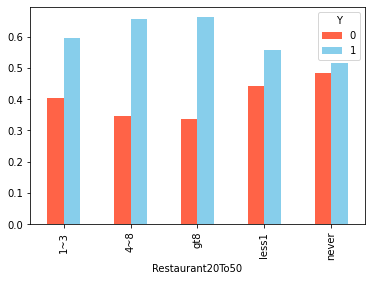

------------------------------------------
toCoupon_GEQ15min
------------------------------------------


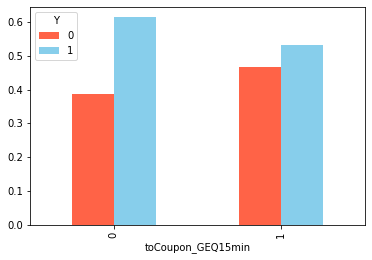

------------------------------------------
toCoupon_GEQ25min
------------------------------------------


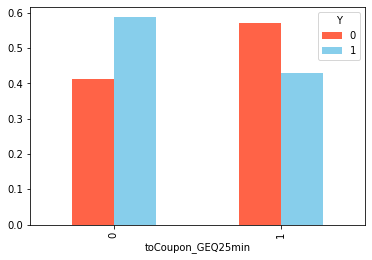

------------------------------------------
direction_same
------------------------------------------


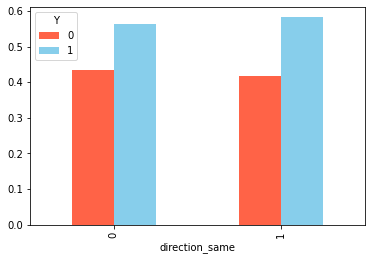

------------------------------------------
direction_opp
------------------------------------------


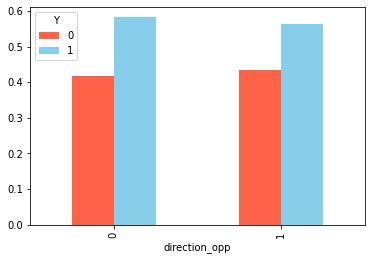

In [ ]:
for col in data.columns:
  if col != 'Y':
    print('-'*42)
    print(col)
    print('-'*42)
    pd.crosstab(index = data[col],
                  columns = data['Y'],
                  values = data['Y'],
                    aggfunc = 'count',
                    normalize = 'index').plot(kind = 'bar', color = ['tomato', 'skyblue']); 
    plt.show()

Aceptan más los cupones, los conductores que:
- No tienen urgencia de llegar a su destino.
- Van acompañados de amigos o partners.
- Cuando el clima es soleado y hay una temperatura de 80 grados preferiblemente.
- Cuando se les recomienda a las 2 de la tarde.
- Cuando el cupón ofrecido contiene productos para llevar.
- Cuando el cupón tiene vigencia de 1 día.
- Los hombres tienden a aceptar más los cupones.
- Conductores menores de 26 años tienden a aceptar más los cupones.
- Conductores solteros.
- Conductores que no tienen hijos.
- Los que tienen estudios secundarios.
- Los que gastan menos de $ 12,500
- Los que van 8 o menos veces al mes a un bar.
- Los que van 8 o menos veces a una cafetería.
- Los que frecuentemente hacen pedidos para llevar.
- Los que frecuentemente gastan yendo a restaurants.
- Si tarda menos de 15 0 25 minutos en llegar al lugar dónde debe canjear el cupón.
- Si esta en la misma dirección que de su destino.